In [2]:
# To upload our datasets from our working directory we need to mount our drive contents to the colab environment. 
# For the code to do so you can search “mount” in code snippets or use the code given below. 
# Our entire drive contents are now mounted on colab at the location “/gdrive”.

from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.nonparametric.kde import KDEUnivariate
from statsmodels.nonparametric import smoothers_lowess
from pandas import Series, DataFrame
from patsy import dmatrices
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
pd.set_option('display.max_columns',None)#displaying long list of columns
pd.set_option('display.max_rows', None)#displaying long list of rows
pd.set_option('display.width', 1000)#width of window
import statsmodels.api as sm


file = r'/gdrive/My Drive/python3/python 3A missing value/modify.csv'
Data = pd.read_csv(file)  #creates a dataframe

print(Data.shape)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive
/gdrive


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


(12132, 25)


In [3]:
Data.head()

,Unnamed: 0,ID,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,P1,P2,P3,P4,P5,P6,P7,P8,Quote,Sold,STime,ETime,Metric1
0,0,662,0,1,0,1,1,0,0,0,0,0,1,0,2,0,1,0,6,1,1,0,16:29:00,16:41:00,0.3
1,1,387,0,1,0,0,0,0,1,0,0,1,1,21,10,0,1,1,11,2,0,0,16:32:00,16:56:00,0.3
2,2,662,0,1,0,0,0,0,0,0,0,0,0,0,4,0,2,0,1,0,1,0,17:02:00,17:19:00,0.1
3,3,662,0,1,0,0,0,0,0,0,0,0,0,1,1,0,7,1,1,0,1,0,18:13:00,18:39:00,0.1
4,4,387,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,18:45:00,18:48:00,0.0


In [2]:
Data['STime'].dtype
Data['STime'] = pd.to_datetime(Data.STime)
Data['ETime']  = pd.to_datetime(Data.ETime)
Data['CTime'] = Data['ETime'] - Data['STime']

In [4]:
list(Data.columns.values.tolist())



['Unnamed: 0',
 'ID',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'C6',
 'C7',
 'C8',
 'C9',
 'C10',
 'P1',
 'P2',
 'P3',
 'P4',
 'P5',
 'P6',
 'P7',
 'P8',
 'Quote',
 'Sold',
 'STime',
 'ETime',
 'Metric1']

In [5]:
Data.drop(['Unnamed: 0', 'STime'], axis=1, inplace=True)
Data.drop(['ETime'], axis=1, inplace=True)

In [39]:
list(Data.columns.values.tolist())

['ID',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'C6',
 'C7',
 'C8',
 'C9',
 'C10',
 'P1',
 'P2',
 'P3',
 'P4',
 'P5',
 'P6',
 'P7',
 'P8',
 'Quote',
 'Sold',
 'Metric1',
 'CTime']

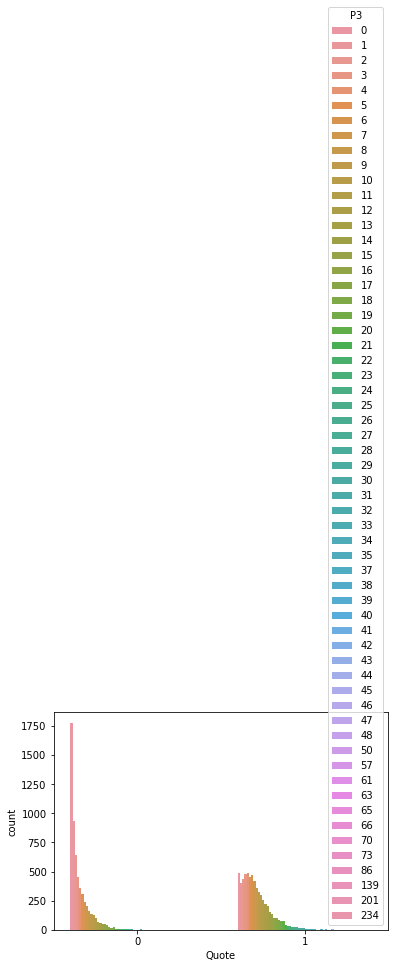

In [7]:

import seaborn as sns
sns.countplot(x='Quote',hue='P3',data=Data)

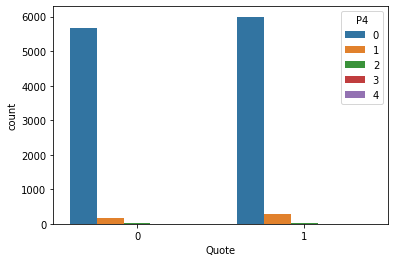

In [14]:
dimport seaborn as sns
sns.countplot(x='Quote',hue='P4',data=Data)

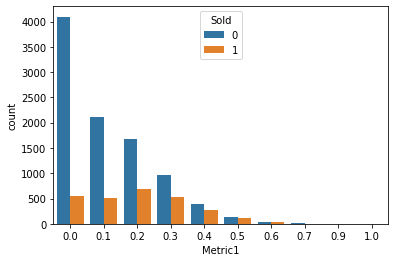

In [17]:
sns.countplot(x='Metric1',hue='Sold',data=Data)

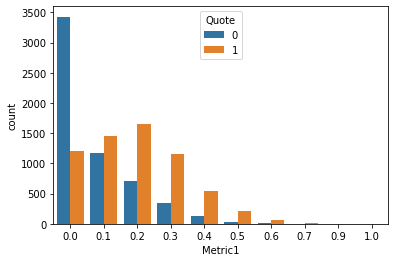

In [18]:
sns.countplot(x='Metric1',hue='Quote',data=Data)

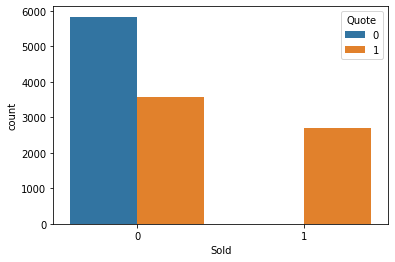

In [19]:
sns.countplot(x='Sold',hue='Quote',data=Data)

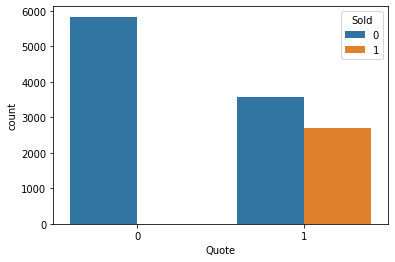

In [20]:
sns.countplot(x='Quote',hue='Sold',data=Data)

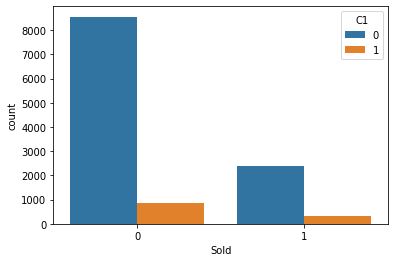

In [24]:
sns.countplot(x='Sold',hue='C1',data=Data)


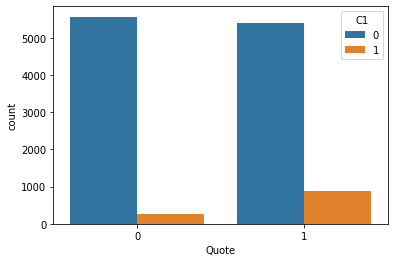

In [25]:
sns.countplot(x='Quote',hue='C1',data=Data)

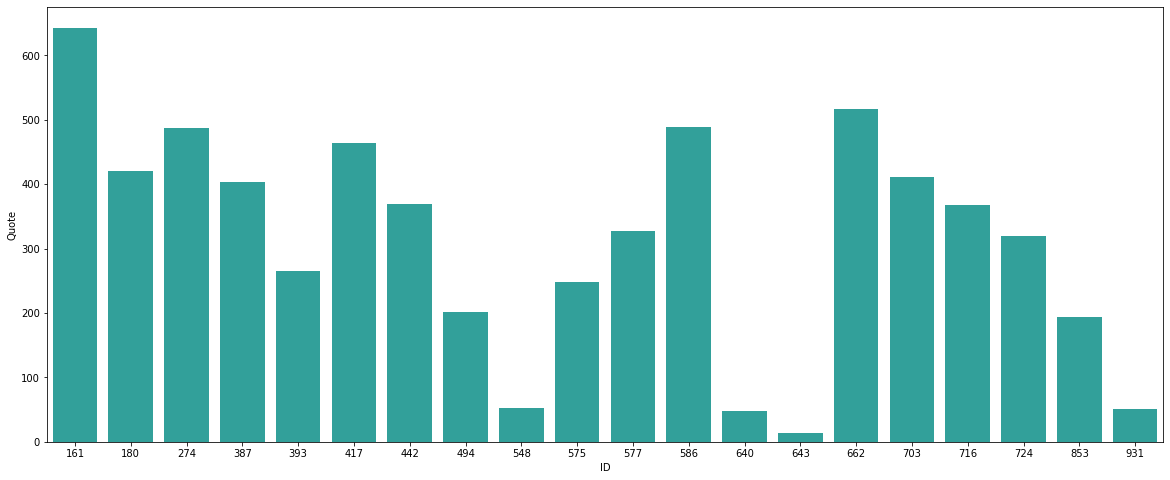

In [33]:
plt.figure(figsize=(20,8))
sum = Data[["ID", "Quote"]].groupby(['ID'], as_index=False).sum()
g = sns.barplot(x='ID', y='Quote', data=sum, color="LightSeaGreen")
plt.show()

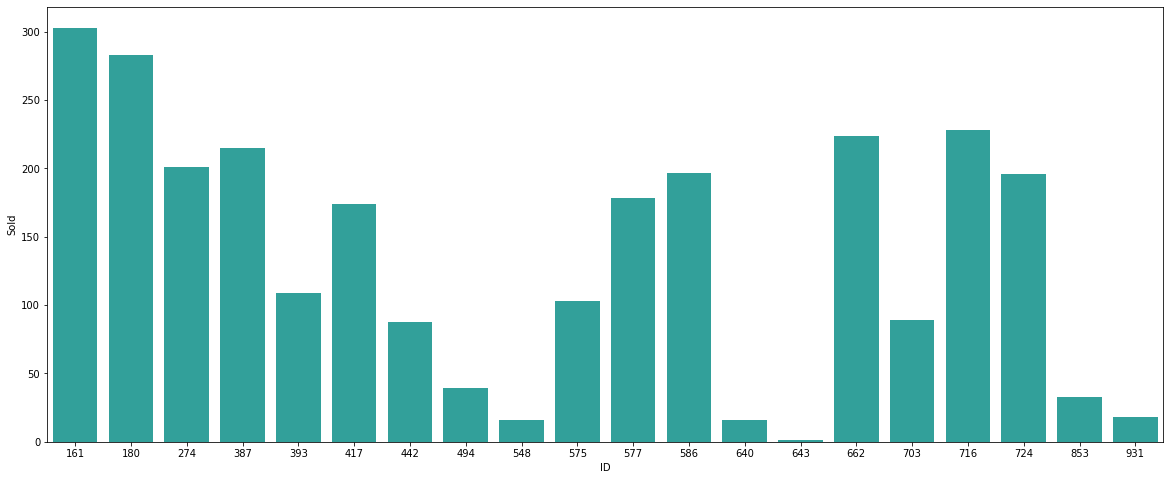

In [34]:
plt.figure(figsize=(20,8))
sum = Data[["ID", "Sold"]].groupby(['ID'], as_index=False).sum()
g = sns.barplot(x='ID', y='Sold', data=sum, color="LightSeaGreen")
plt.show()

In [1]:
sns.countplot(x='Sold',hue='C10',data=Data)

NameError: ignored

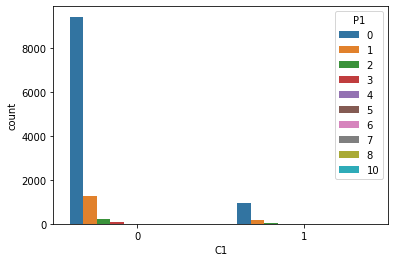

In [37]:
sns.countplot(x='C1',hue='P1',data=Data)

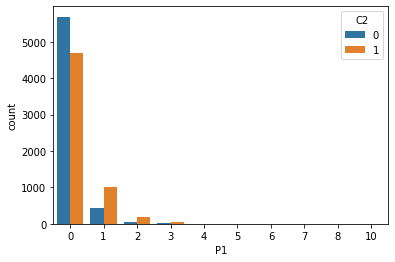

In [38]:
sns.countplot(x='P1',hue='C2',data=Data)

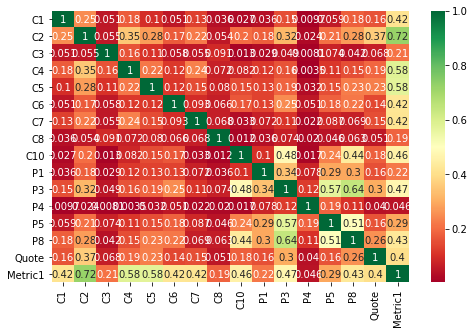

In [46]:


Selected_features = ['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C10', 'P1', 'P3', 'P4', 'P5', 'P8', 'Quote', 'Metric1']
X = Data[Selected_features]

plt.subplots(figsize=(8, 5))
sns.heatmap(X.corr(), annot=True, cmap="RdYlGn")
plt.show()



In [10]:
Data.std()

ID                        201.981
C1                       0.294527
C2                       0.499932
C3                       0.104903
C4                        0.34636
C5                       0.411445
C6                       0.297334
C7                       0.238423
C8                       0.114085
C9                       0.219547
C10                      0.373649
P1                       0.514395
P2                        5.41005
P3                        7.05695
P4                       0.218873
P5                        2.55197
P6                        1.84849
P7                        7.31028
P8                        2.15878
Quote                    0.499667
Sold                      0.41658
Metric1                  0.140299
CTime      0 days 01:36:36.319838
dtype: object

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f18c5fcafd0>,
      dtype=object)

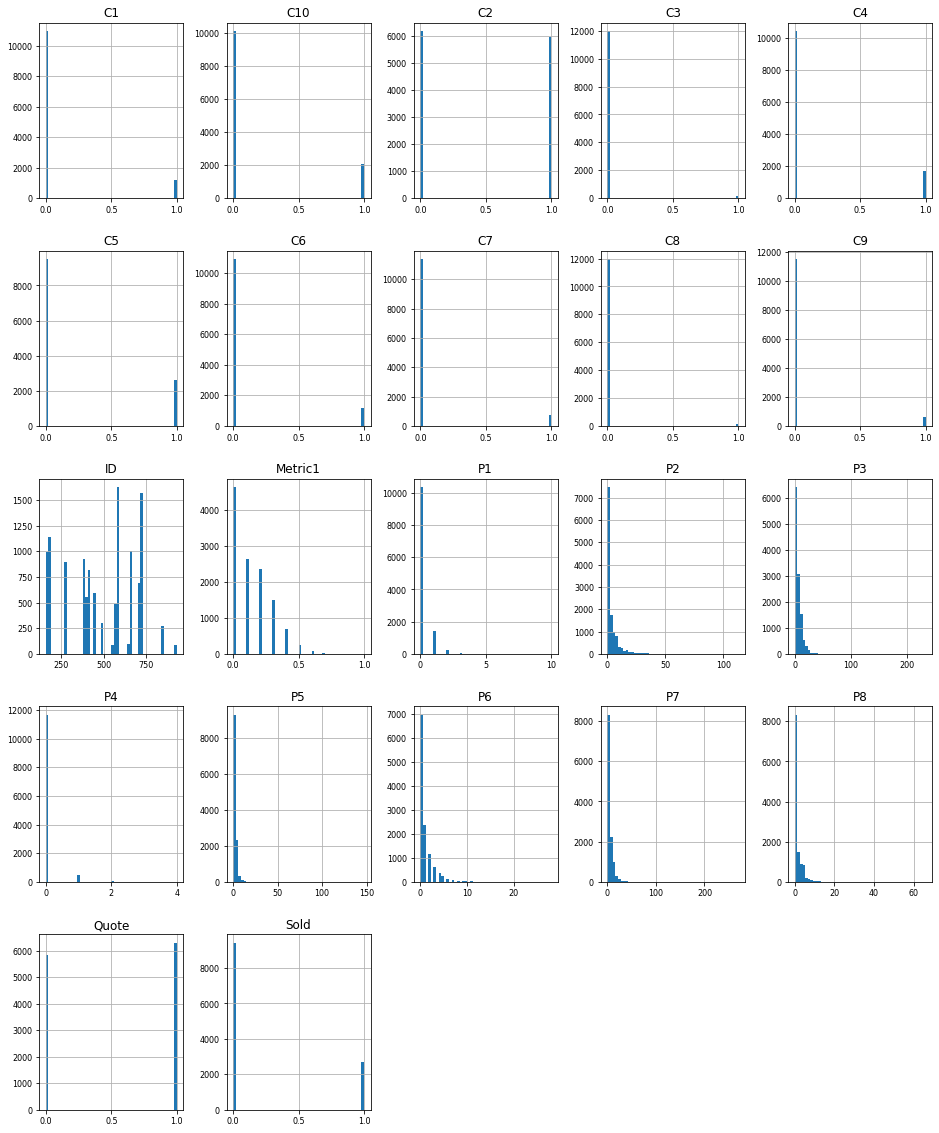

In [11]:
df_num = Data.select_dtypes(include = ['float64', 'int64'])
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)